In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [2]:
def std_col_names(df):
    """
    - Convert feature names to lower case
    - Rename reporting date column 
    """
    df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')
    df.rename(columns = {'employment_duration': 'property', 'debit_to_income': 'debt_to_income', 'home_ownership': 'emp_duration'}, inplace= True)
    df['loan_title'] = df['loan_title'].str.lower().str.strip().str.replace(' ', '_')
    return df



In [3]:
# Load DF
df = std_col_names(pd.read_csv('./data/train.csv'))

In [4]:
# View DF
df.head()

,id,loan_amount,funded_amount,funded_amount_investor,term,batch_enrolled,interest_rate,grade,sub_grade,property,emp_duration,verification_status,payment_plan,loan_title,debt_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,initial_list_status,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,application_type,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
0,65087372,10000,32236,12329.36286,59,BAT2522922,11.135007,B,C4,MORTGAGE,176346.62670,Not Verified,n,debt_consolidation,16.284758,1,0,13,0,24246,74.932551,7,w,2929.646315,0.102055,2.498291,0.793724,0,INDIVIDUAL,49,0,31,311301,6619,0
1,1450153,3609,11940,12191.99692,59,BAT1586599,12.237563,C,D3,RENT,39833.92100,Source Verified,n,debt_consolidation,15.412409,0,0,12,0,812,78.297186,13,f,772.769385,0.036181,2.377215,0.974821,0,INDIVIDUAL,109,0,53,182610,20885,0
2,1969101,28276,9311,21603.22455,59,BAT2136391,12.545884,F,D4,MORTGAGE,91506.69105,Source Verified,n,debt_consolidation,28.137619,0,0,14,0,1843,2.073040,20,w,863.324396,18.778660,4.316277,1.020075,0,INDIVIDUAL,66,0,34,89801,26155,0
3,6651430,11170,6954,17877.15585,59,BAT2428731,16.731201,C,C3,MORTGAGE,108286.57590,Source Verified,n,debt_consolidation,18.043730,1,0,7,0,13819,67.467951,12,w,288.173196,0.044131,0.107020,0.749971,0,INDIVIDUAL,39,0,40,9189,60214,0
4,14354669,16890,13226,13539.92667,59,BAT5341619,15.008300,C,D4,MORTGAGE,44234.82545,Source Verified,n,credit_card_refinancing,17.209886,1,3,13,1,1544,85.250761,22,w,129.239553,19.306646,1294.818751,0.368953,0,INDIVIDUAL,18,0,430,126029,22579,0


In [5]:
# Check DF info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            67463 non-null  int64  
 1   loan_amount                   67463 non-null  int64  
 2   funded_amount                 67463 non-null  int64  
 3   funded_amount_investor        67463 non-null  float64
 4   term                          67463 non-null  int64  
 5   batch_enrolled                67463 non-null  object 
 6   interest_rate                 67463 non-null  float64
 7   grade                         67463 non-null  object 
 8   sub_grade                     67463 non-null  object 
 9   property                      67463 non-null  object 
 10  emp_duration                  67463 non-null  float64
 11  verification_status           67463 non-null  object 
 12  payment_plan                  67463 non-null  object 
 13  l

In [6]:
# View data distributions
df.describe().loc[['min', 'max', 'mean']]

,id,loan_amount,funded_amount,funded_amount_investor,term,interest_rate,emp_duration,debt_to_income,delinquency_-_two_years,inquires_-_six_months,open_account,public_record,revolving_balance,revolving_utilities,total_accounts,total_received_interest,total_received_late_fee,recoveries,collection_recovery_fee,collection_12_months_medical,last_week_pay,accounts_delinquent,total_collection_amount,total_current_balance,total_revolving_credit_limit,loan_status
min,1.297933e+06,1014.000000,1014.000000,1114.590204,36.000000,5.320006,14573.537170,0.675299,0.000000,0.000000,2.000000,0.000000,0.000000,0.005172,4.000000,4.736746,0.000003,0.000036,0.000036,0.000000,0.00000,0.0,1.00000,6.170000e+02,1000.000000,0.00000
max,7.224578e+07,35000.000000,34999.000000,34999.746430,59.000000,27.182348,406561.536400,39.629862,8.000000,5.000000,37.000000,4.000000,116933.000000,100.880050,72.000000,14301.368310,42.618882,4354.467419,166.833000,1.000000,161.00000,0.0,16421.00000,1.177412e+06,201169.000000,1.00000
mean,2.562761e+07,16848.902776,15770.599114,14621.799323,58.173814,11.846258,80541.502522,23.299241,0.327127,0.145754,14.266561,0.081437,7699.342425,52.889443,18.627929,2068.992542,1.143969,59.691578,1.125141,0.021301,71.16326,0.0,146.46799,1.595739e+05,23123.005544,0.09251


#### Observation 
- ~10% f the train set defaults;imbalanced dataset

In [7]:
# feature data type distribution
cols = df.columns.to_list()
num_cols = df.select_dtypes(['int64', 'float64']).columns.to_list()
cat_cols = df.select_dtypes(['object']).columns.to_list()

print(f'Number of numerical features: {len(num_cols)}\nNumber of categorical features: {len(cat_cols)}')

Number of numerical features: 26
Number of categorical features: 9


In [8]:
# Evaluate unique values for each feature
df[cat_cols].nunique()

batch_enrolled          41
grade                    7
sub_grade               35
property                 3
verification_status      3
payment_plan             1
loan_title             109
initial_list_status      2
application_type         2
dtype: int64

In [42]:
df[num_cols].nunique() 

id                              67463
loan_amount                     27525
funded_amount                   24548
funded_amount_investor          67441
term                                3
interest_rate                   67448
emp_duration                    67454
debt_to_income                  67454
delinquency_-_two_years             9
inquires_-_six_months               6
open_account                       36
public_record                       5
revolving_balance               20582
revolving_utilities             67458
total_accounts                     69
total_received_interest         67451
total_received_late_fee         67380
recoveries                      67387
collection_recovery_fee         67313
collection_12_months_medical        2
last_week_pay                     162
accounts_delinquent                 1
total_collection_amount          2193
total_current_balance           60901
total_revolving_credit_limit    37708
loan_status                         2
dtype: int64

In [49]:
n_payment_plan = df['payment_plan'].unique()
n_accounts_delinquent = df['accounts_delinquent'].unique()
n_collection_12_months_medical = df['collection_12_months_medical'].unique()
print(f'payment_plan unique values: { n_payment_plan }')
print(f'accounts_delinquent unique values: {n_accounts_delinquent}')
print(f'collection_12_months_medical unique values: {n_collection_12_months_medical}')

payment_plan unique values: ['n']
accounts_delinquent unique values: [0]
collection_12_months_medical unique values: [0 1]


In [ ]:
# columns to be dropped
drop_cols = ['payment_plan', 'accounts_delinquent']

In [9]:
# observe loan_title feature
df['loan_title'].unique()

array(['Debt Consolidation', 'Debt consolidation',
       'Credit card refinancing', 'Home improvement',
       'Credit Consolidation', 'Green loan', 'Other',
       'Moving and relocation', 'Credit Cards', 'Medical expenses',
       'DEBT CONSOLIDATION', 'Home Improvement', 'Refinance',
       'credit card consolidation', 'Lending Club',
       'Debt Consolidation Loan', 'Major purchase', 'Vacation',
       'Business', 'Credit card payoff', 'Credit Card Consolidation',
       'credit card', 'Credit Card Refi', 'Personal Loan', 'CC Refi',
       'consolidate', 'Medical', 'Loan 1', 'Consolidation',
       'Card Consolidation', 'Car financing', 'debt', 'home improvement',
       'debt consolidation', 'Home buying', 'Freedom', 'Consolidate',
       'Consolidated', 'get out of debt', 'consolidation loan',
       'Dept consolidation', 'Personal loan', 'Personal', 'Debt', 'cards',
       'Cards', 'Bathroom', 'refi', 'Credit Card Loan',
       'Credit Card Debt', 'House', 'Debt Consolidation 

## Questions:
1) approved amount vs status  
2) funded amount vs status  
3) interest rate vs status  
4) property vs status  
5) Proportion of status for each grade  
6) verification vs status  
7) total accounts vs open accounts  
8) term vs status  
9) funded amount vs interest rate

In [22]:
num_cols

['id',
 'loan_amount',
 'funded_amount',
 'funded_amount_investor',
 'term',
 'interest_rate',
 'emp_duration',
 'debt_to_income',
 'delinquency_-_two_years',
 'inquires_-_six_months',
 'open_account',
 'public_record',
 'revolving_balance',
 'revolving_utilities',
 'total_accounts',
 'total_received_interest',
 'total_received_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collection_12_months_medical',
 'last_week_pay',
 'accounts_delinquent',
 'total_collection_amount',
 'total_current_balance',
 'total_revolving_credit_limit',
 'loan_status']

In [52]:
viz_cols = [
    'loan_amount',
 'funded_amount',
 'funded_amount_investor',
 'term',
'debt_to_income',
'delinquency_-_two_years',
'inquires_-_six_months',
'open_account',
 'public_record',
 'revolving_balance',
 'revolving_utilities',
 'total_accounts',
 'total_received_interest',
 'total_received_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'collection_12_months_medical',
 'last_week_pay',
 'accounts_delinquent',
 'total_collection_amount',
 'total_current_balance',
 'total_revolving_credit_limit'
]


In [80]:
sns.set_palette("colorblind")
sns.set(rc={'figure.figsize':(13,13)})

<AxesSubplot:xlabel='funded_amount', ylabel='Percent'>

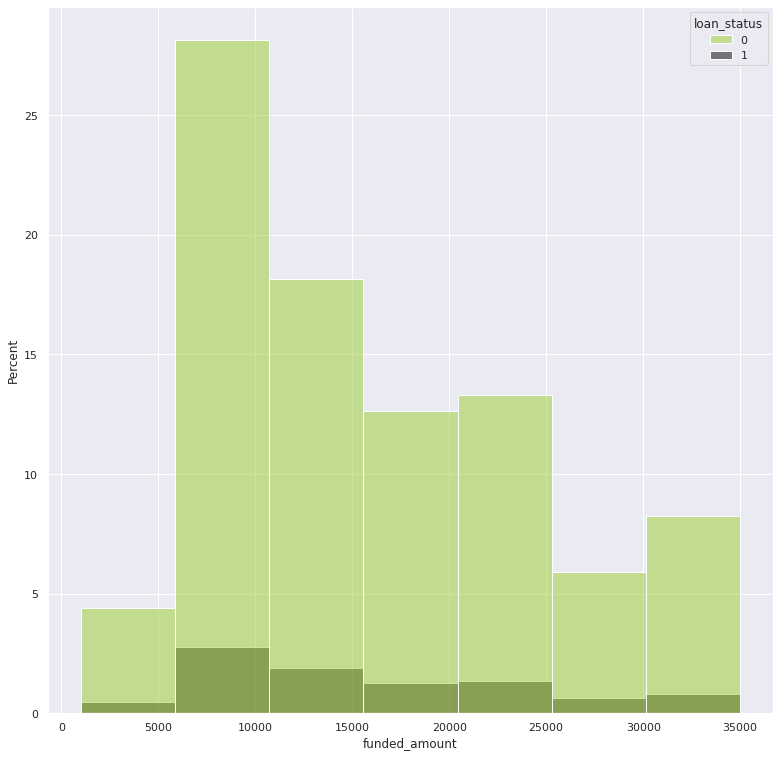

In [110]:
sns.histplot(df, x= 'funded_amount', hue= 'loan_status', stat= 'percent', bins= 7, binrange= (1000, 35000), palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='funded_amount_investor', ylabel='Percent'>

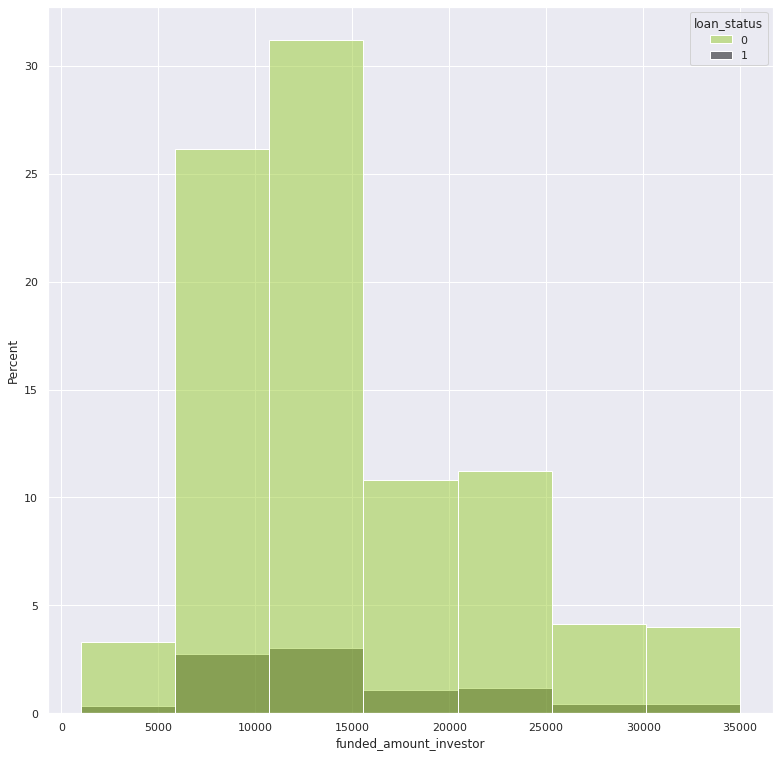

In [112]:
sns.histplot(df, x= 'funded_amount_investor', hue= 'loan_status', stat= 'percent', bins= 7, binrange= (1000, 35000), palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='interest_rate', ylabel='Percent'>

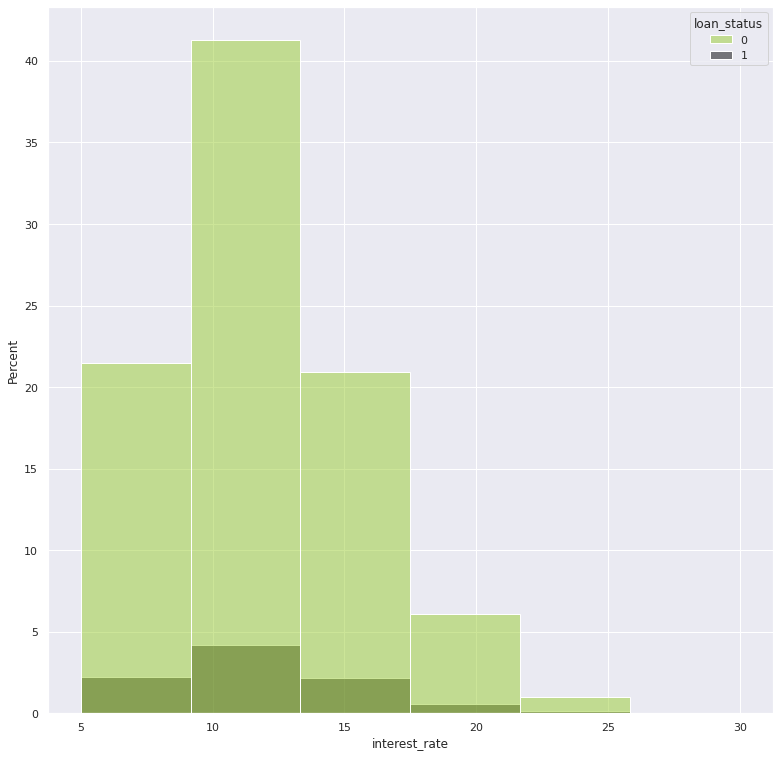

In [126]:
sns.histplot(df, x= 'interest_rate', hue= 'loan_status', stat= 'percent', bins= 6, binrange= (5, 30), palette= ['yellowgreen', 'black'])

Text(0.5, 1.0, 'Interest rate distribution for defaulters')

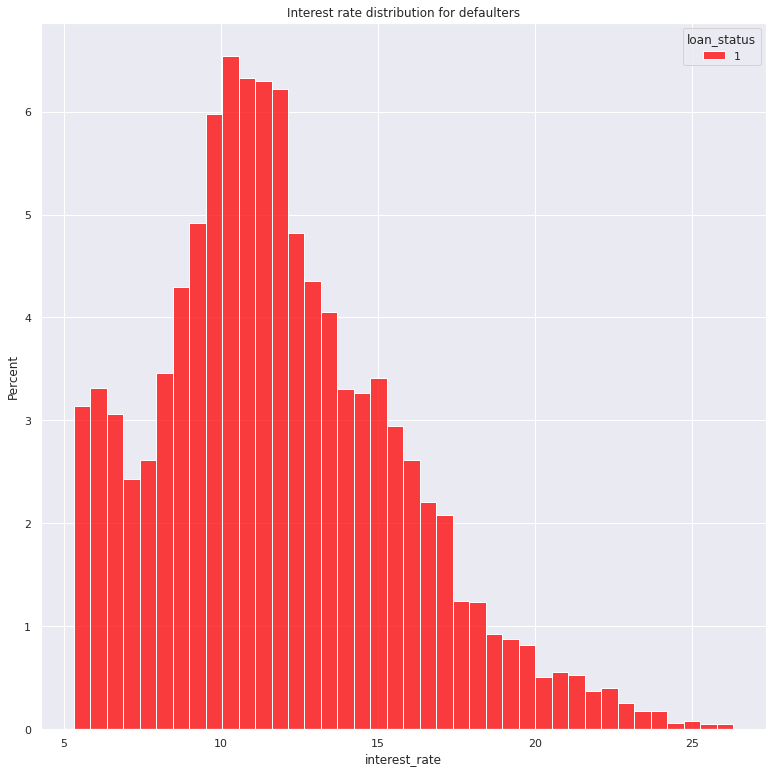

In [130]:
sns.histplot(df[df['loan_status']==1], x= 'interest_rate', hue= 'loan_status', stat= 'percent',  palette= ['red'], multiple= 'dodge').set_title('Interest rate distribution for defaulters')

In [276]:
def norm_cat_plot(df, feature, target= 'loan_status'):
    feature_counts = df.groupby(by= target)[feature].value_counts(normalize= True).rename('percentage').mul(100).reset_index()
    norm_plot = sns.barplot(data= feature_counts, x= target, y= 'percentage', hue= feature)
    return norm_plot

<AxesSubplot:xlabel='loan_status', ylabel='percentage'>

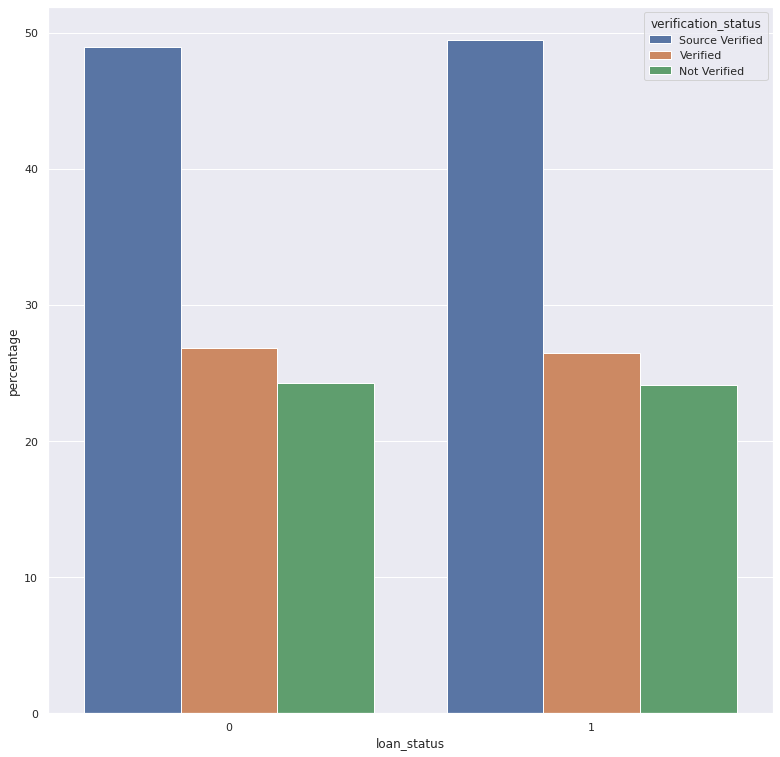

In [272]:
norm_cat_plot(df, 'verification_status')

TypeError: 'NoneType' object is not iterable

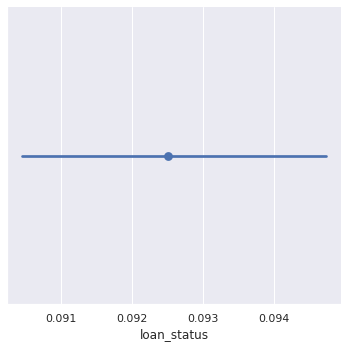

In [256]:
sns.factorplot(data= df, x= 'loan_status', hue= 'property')

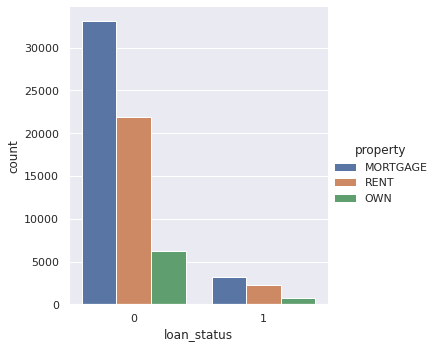

In [219]:
# # Undesirable approach

# # continuous xlabel
# sns.histplot(df, x= 'loan_status', hue= 'property', stat= 'percent',  multiple= 'dodge', discrete= True)

# # distribution is not normalized
# sns.catplot("loan_status", hue="property", data=df, kind= 'count')

<AxesSubplot:xlabel='grade', ylabel='Percent'>

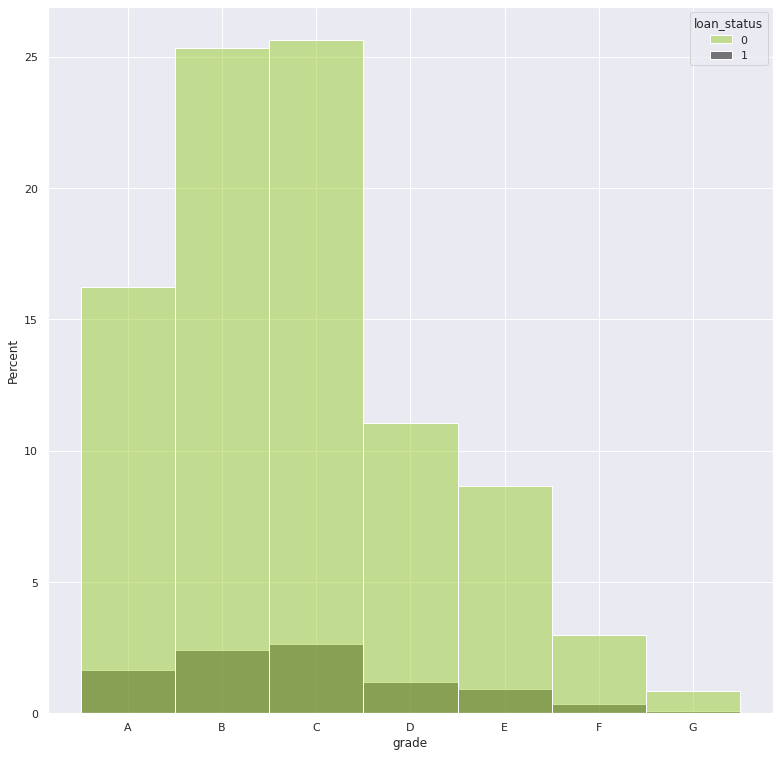

In [137]:
sns.histplot(df.sort_values(by= 'grade'), x= 'grade', hue= 'loan_status', stat= 'percent', palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='loan_status', ylabel='percentage'>

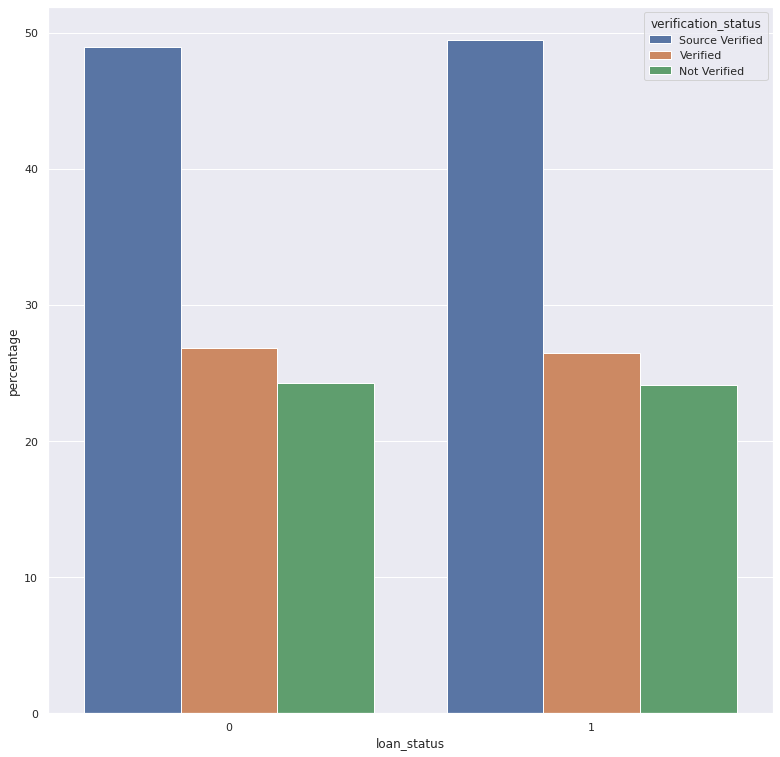

In [278]:
norm_cat_plot(df, 'verification_status')

In [315]:
print((df['open_account']>df['total_accounts']).value_counts())
df[df['loan_status']==1][['open_account', 'total_accounts', 'loan_status']]

False    46700
True     20763
dtype: int64


,open_account,total_accounts,loan_status
15,9,13,1
19,26,16,1
25,10,14,1
44,9,46,1
61,17,27,1
...,...,...,...
67398,13,14,1
67402,15,25,1
67404,18,9,1
67427,16,19,1


<AxesSubplot:xlabel='open_account', ylabel='total_accounts'>

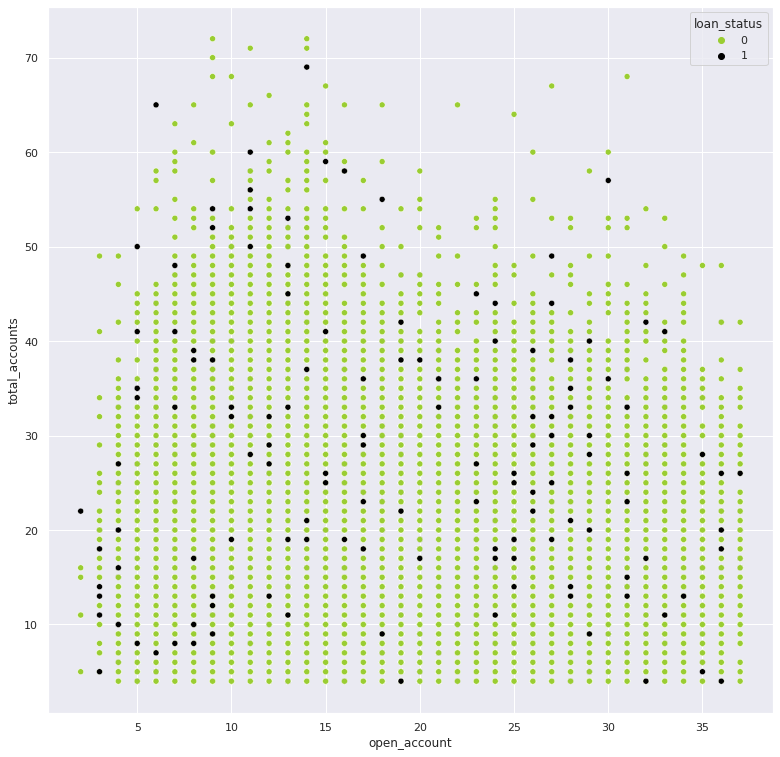

In [319]:
sns.scatterplot(data= df, x= 'open_account', y= 'total_accounts', hue= 'loan_status', palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='open_account', ylabel='total_accounts'>

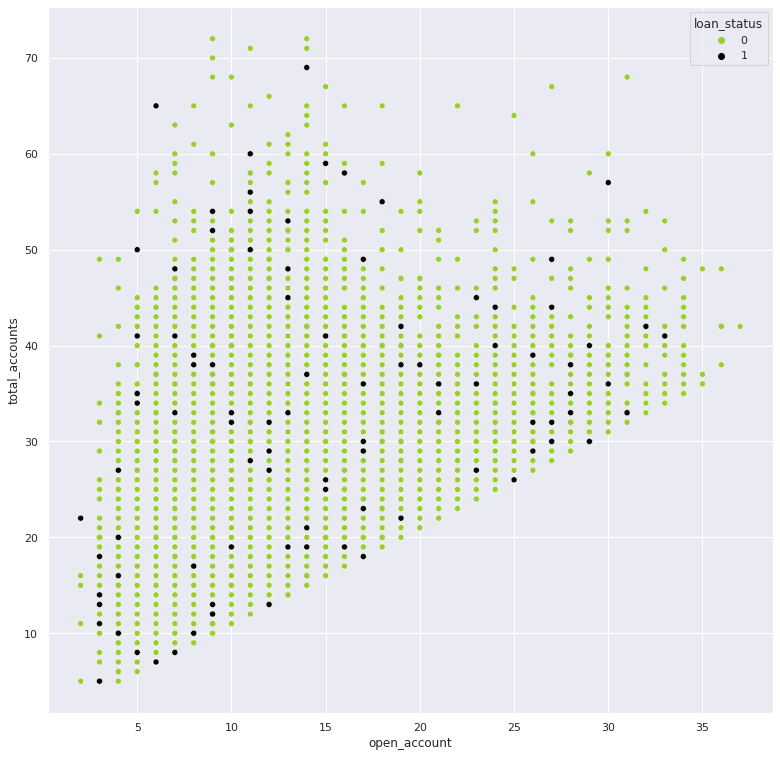

In [328]:
df['bal_accounts'] = df['total_accounts'] - df['open_account']
sns.scatterplot(data= df[df['bal_accounts']>0], x= 'open_account', y= 'total_accounts', hue= 'loan_status', palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='bal_accounts', ylabel='Percent'>

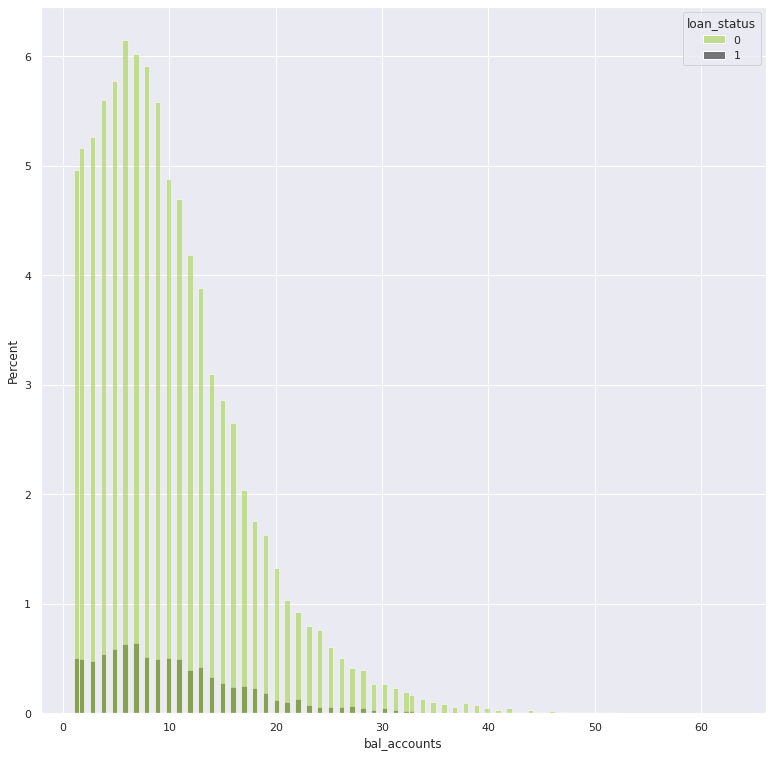

In [329]:
sns.histplot(data=df[df['bal_accounts']>0] , x= 'bal_accounts', hue= 'loan_status', palette= ['yellowgreen', 'black'], stat= 'percent')

<AxesSubplot:xlabel='bal_accounts', ylabel='Percent'>

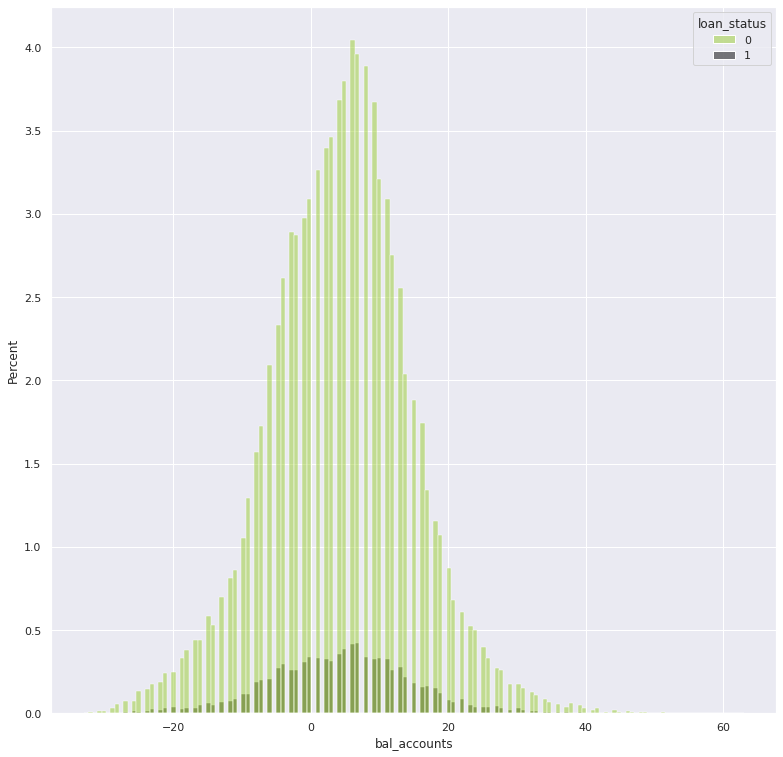

In [369]:
sns.histplot(data=df , x= 'bal_accounts', hue= 'loan_status', palette= ['yellowgreen', 'black'], stat= 'percent')

<AxesSubplot:xlabel='bal_accounts', ylabel='Percent'>

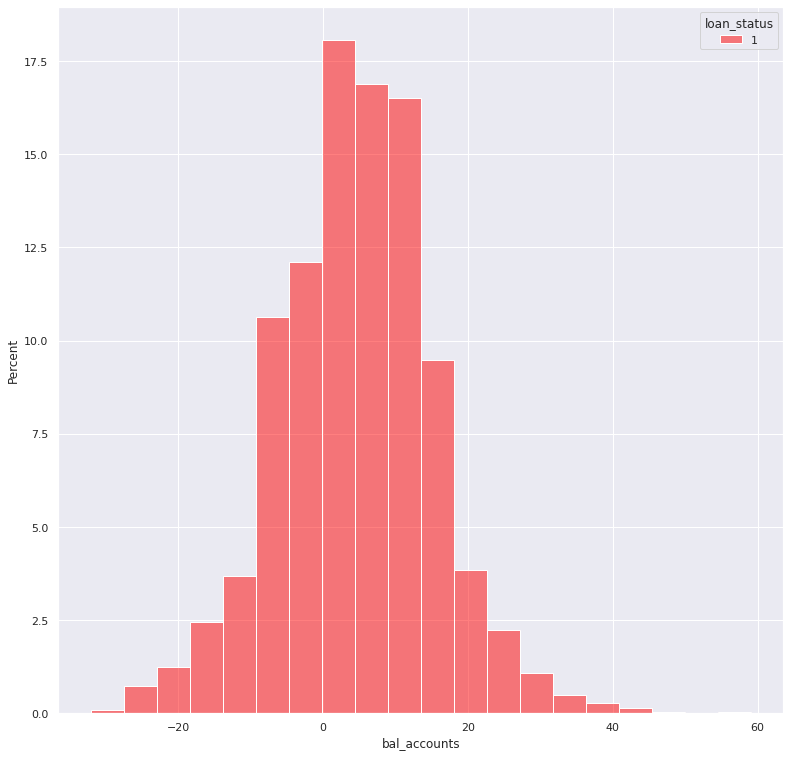

In [373]:
sns.histplot(data=df[df['loan_status']==1] , x= 'bal_accounts', hue= 'loan_status', palette= ['red'], stat= 'percent', bins= 20)

<AxesSubplot:xlabel='loan_status', ylabel='percentage'>

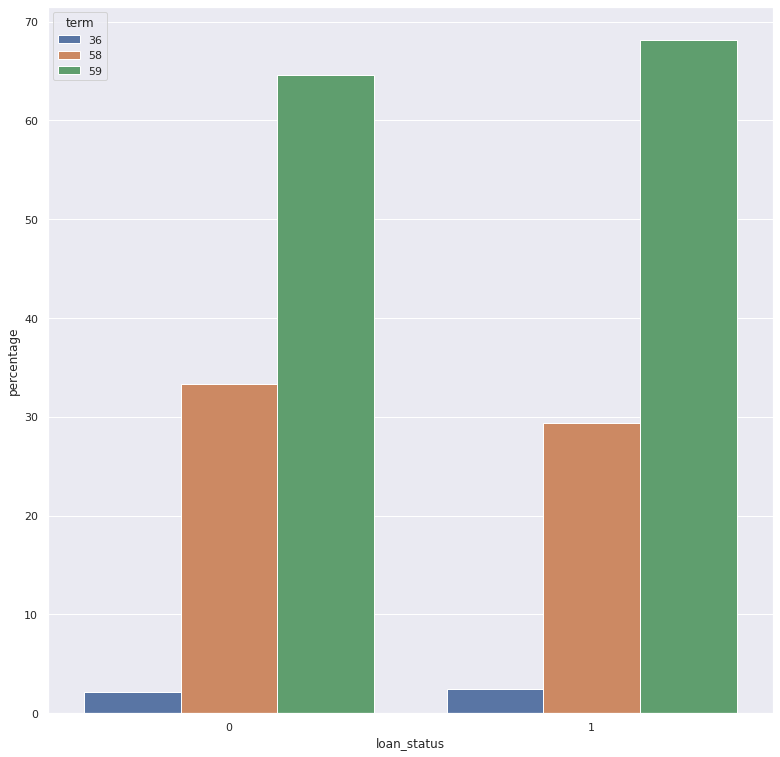

In [330]:
norm_cat_plot(df, 'term')

<AxesSubplot:xlabel='term', ylabel='percentage'>

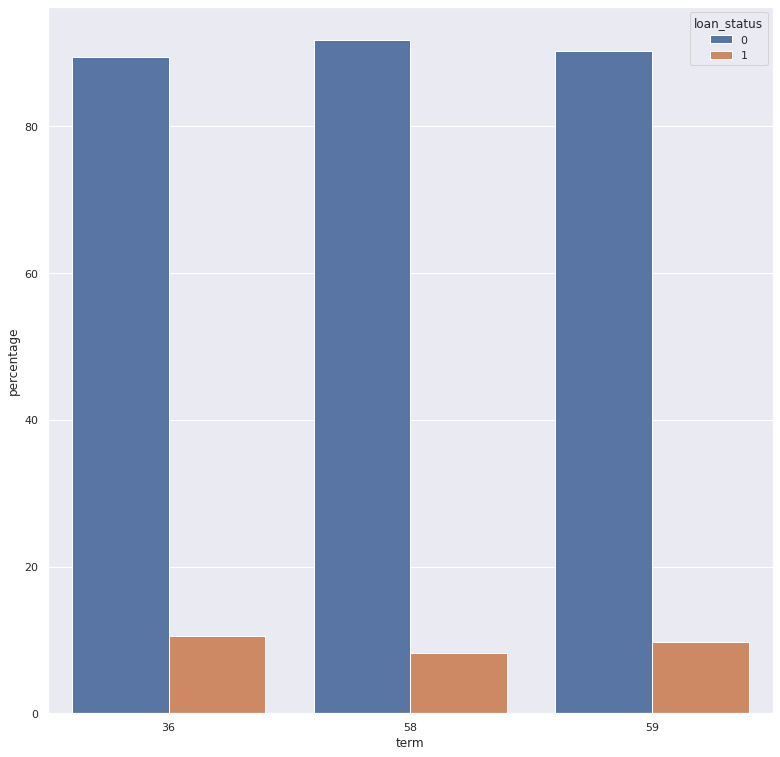

In [344]:
# sns.histplot(data= df, x= 'term',discrete= True, hue= 'loan_status',palette= ['yellowgreen', 'black'])
norm_cat_plot(df, 'loan_status', 'term')

<AxesSubplot:xlabel='funded_amount', ylabel='interest_rate'>

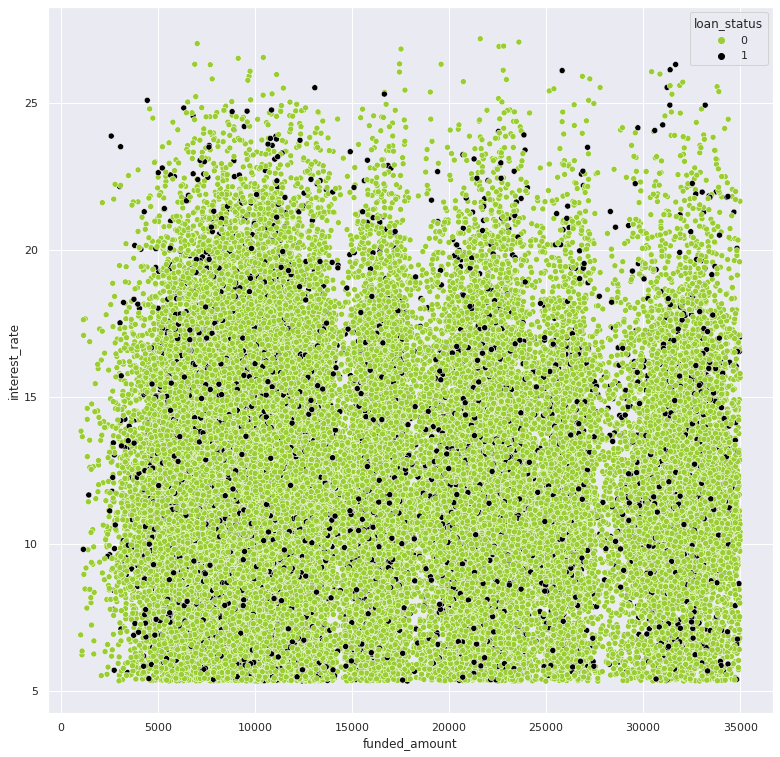

In [345]:
sns.scatterplot(data= df, x= 'funded_amount', y= 'interest_rate', hue= 'loan_status', palette= ['yellowgreen', 'black'])

In [353]:
df['loan_title'] = df['loan_title'].str.lower().str.strip().str.replace(' ', '_')
df['loan_title'].nunique() # unique_count: 109 -> 83

83

In [356]:
sns.histplot(data= df, y= 'loan_title', stat= 'percent', hue= 'loan_status', palette= ['greenyellow', 'black'])

array(['debt_consolidation', 'credit_card_refinancing',
       'home_improvement', 'credit_consolidation', 'green_loan', 'other',
       'moving_and_relocation', 'credit_cards', 'medical_expenses',
       'refinance', 'credit_card_consolidation', 'lending_club',
       'debt_consolidation_loan', 'major_purchase', 'vacation',
       'business', 'credit_card_payoff', 'credit_card',
       'credit_card_refi', 'personal_loan', 'cc_refi', 'consolidate',
       'medical', 'loan_1', 'consolidation', 'card_consolidation',
       'car_financing', 'debt', 'home_buying', 'freedom', 'consolidated',
       'get_out_of_debt', 'consolidation_loan', 'dept_consolidation',
       'personal', 'cards', 'bathroom', 'refi', 'credit_card_loan',
       'credit_card_debt', 'house', 'debt_consolidation_2013',
       'debt_loan', 'cc_refinance', 'home', 'cc_consolidation',
       'credit_card_refinance', 'credit_loan', 'payoff',
       'bill_consolidation', 'credit_card_paydown', 'credit_card_pay_off',
       'g

<AxesSubplot:xlabel='Percent', ylabel='batch_enrolled'>

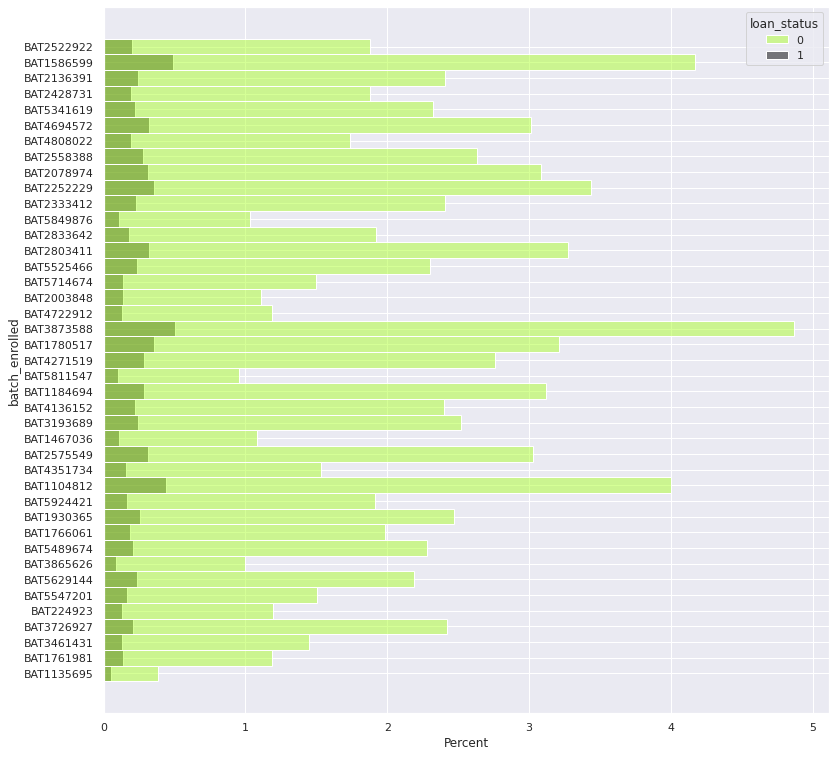

In [368]:
sns.histplot(data= df, y= 'batch_enrolled', stat= 'percent', hue= 'loan_status', palette= ['greenyellow', 'black'])

<AxesSubplot:xlabel='total_received_late_fee', ylabel='Percent'>

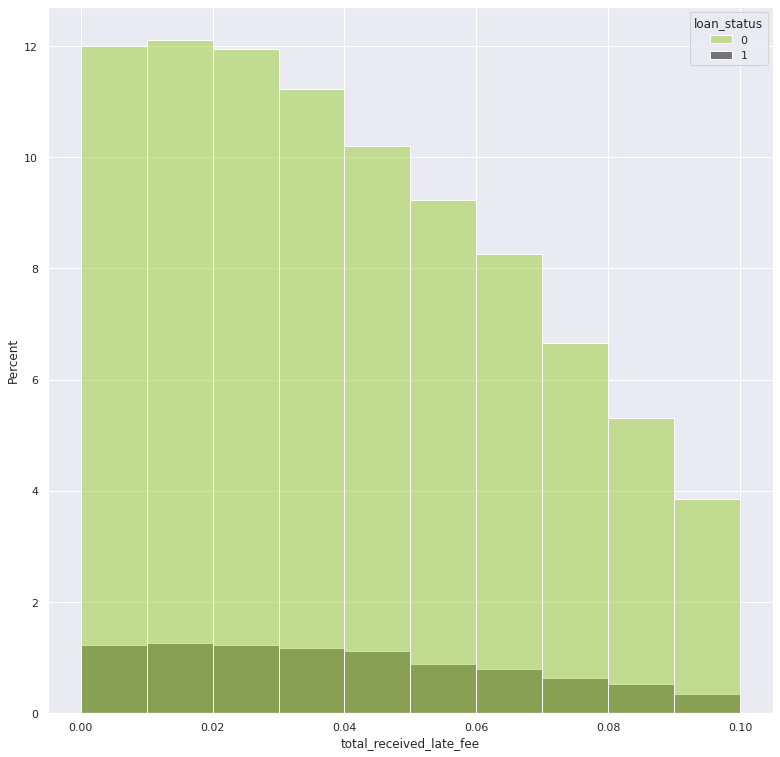

In [393]:
sns.histplot(df[df['total_received_late_fee']<5], x= 'total_received_late_fee', hue= 'loan_status', bins= 10, binrange= [0,0.1], palette= ['yellowgreen', 'black'], stat= 'percent')


<AxesSubplot:xlabel='total_received_late_fee', ylabel='Count'>

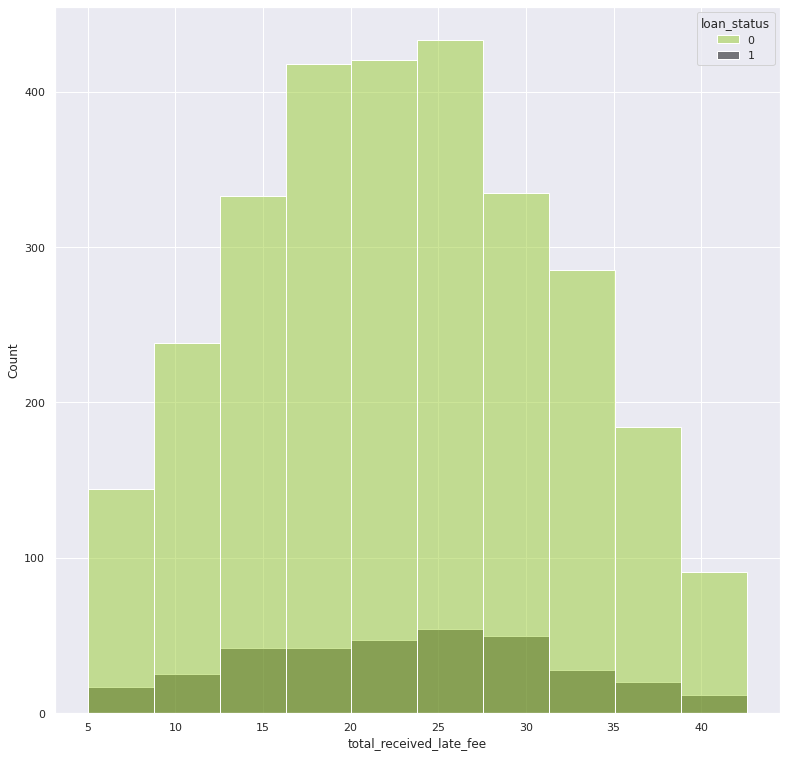

In [389]:
sns.histplot(df[df['total_received_late_fee']>5], x= 'total_received_late_fee', hue= 'loan_status', bins= 10, palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='total_current_balance', ylabel='total_revolving_credit_limit'>

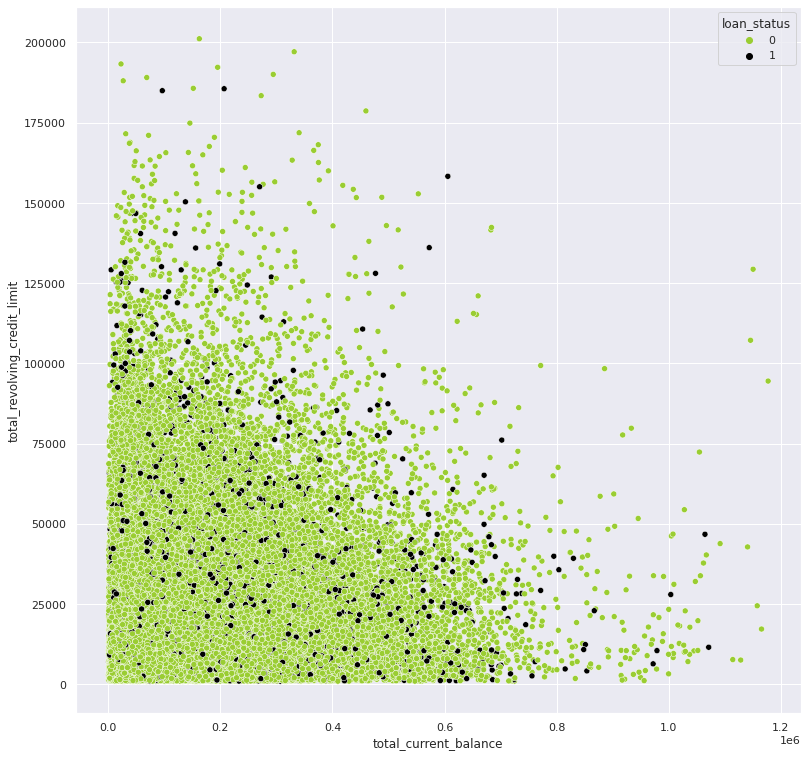

In [394]:
sns.scatterplot(data= df, x= 'total_current_balance', y= 'total_revolving_credit_limit', hue= 'loan_status', palette= ['yellowgreen', 'black'])


<AxesSubplot:xlabel='application_type', ylabel='percentage'>

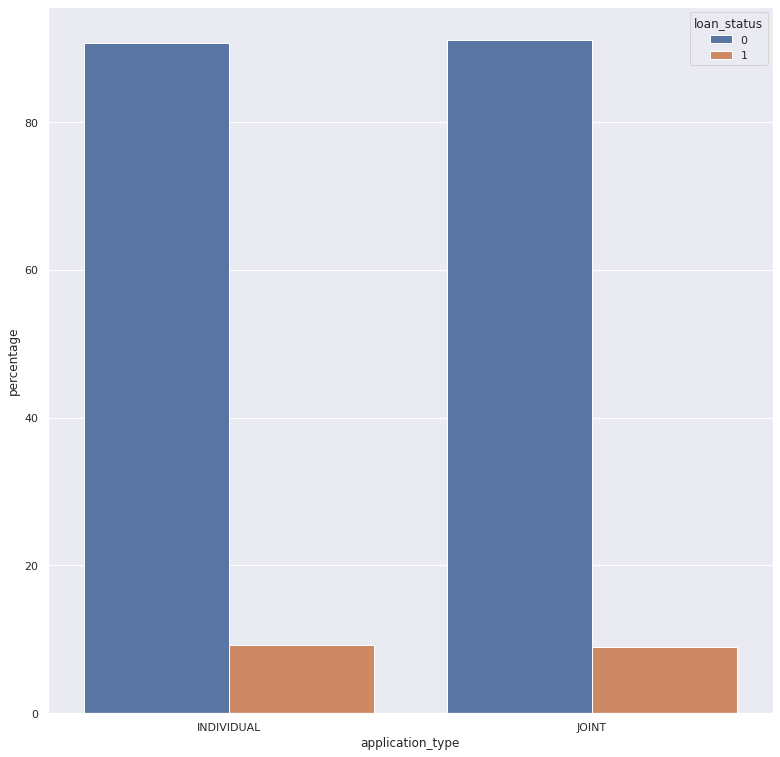

In [405]:
norm_cat_plot(df, 'loan_status', 'application_type')

<AxesSubplot:xlabel='delinquency_-_two_years', ylabel='revolving_utilities'>

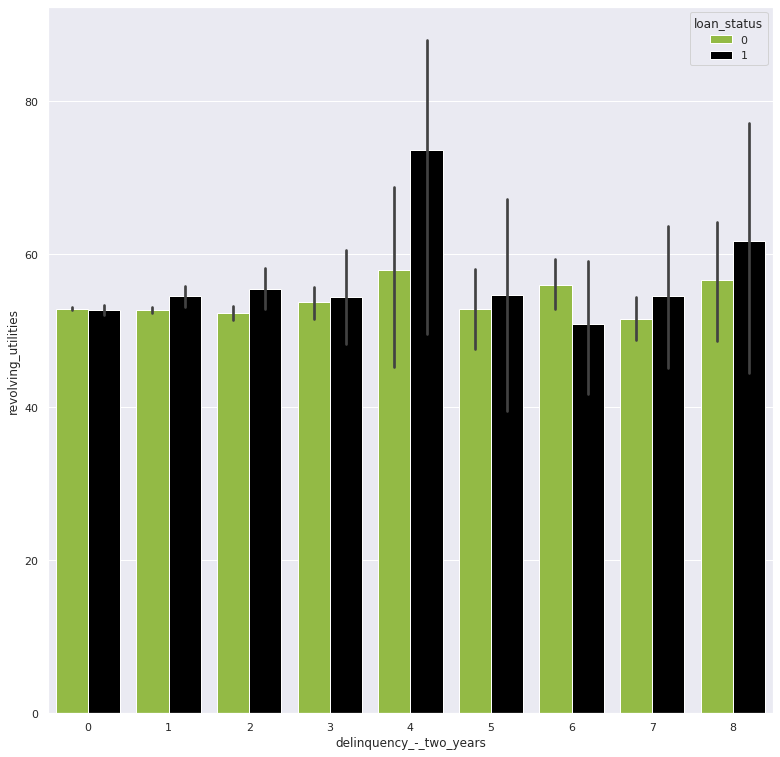

In [411]:
# can also use scatterplot
sns.barplot(data=df, x='delinquency_-_two_years', y= 'revolving_utilities', hue= 'loan_status', palette= ['yellowgreen', 'black'])

<AxesSubplot:xlabel='initial_list_status', ylabel='Percent'>

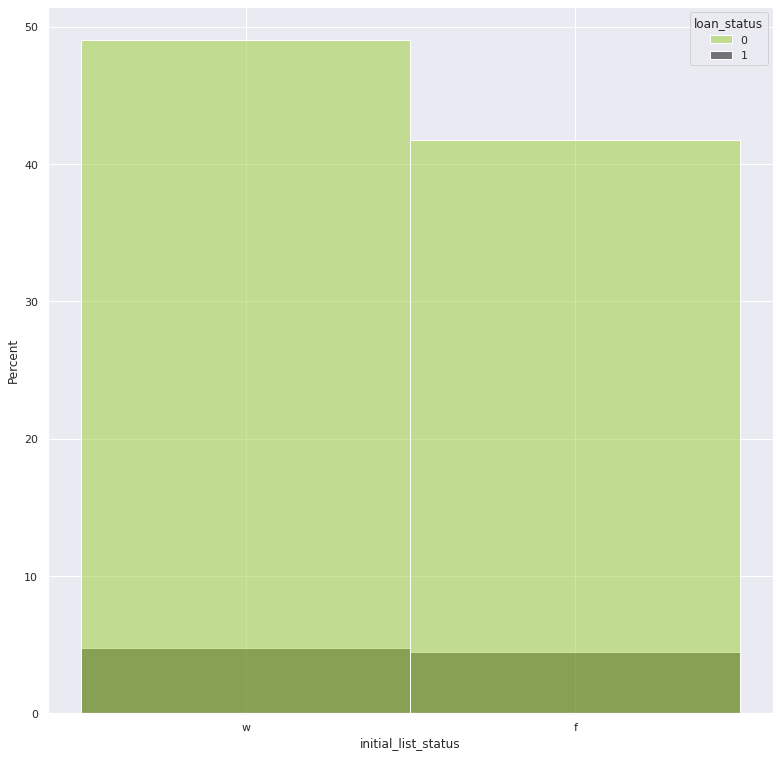

In [415]:
sns.histplot(df, x= 'initial_list_status', hue= 'loan_status',  palette= ['yellowgreen', 'black'], stat= 'percent')

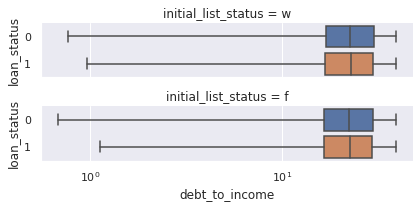

In [413]:
g = sns.catplot(x="debt_to_income", y="loan_status", row="initial_list_status",
                kind="box", orient="h", height=1.5, aspect=4,
                data=df)
g.set(xscale="log")

----------

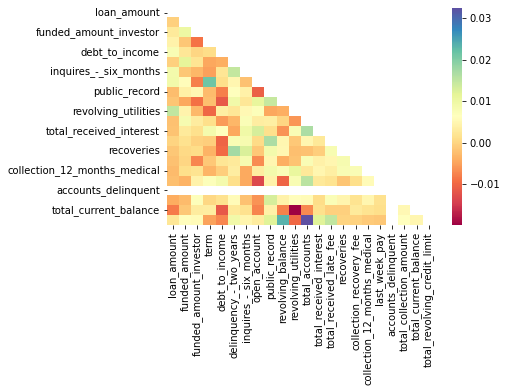

In [53]:
corr_df = df[viz_cols].corr()

mask_ut=np.triu(np.ones(corr_df.shape)).astype(np.bool)

hmap = sns.heatmap(corr_df, mask=mask_ut, cmap="Spectral")
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn_using_mask.png",
                    format='png',
                    dpi=150)

In [426]:
from sklearn.feature_selection import mutual_info_classif
mi = mutual_info_classif(df[viz_cols], df[cols[-1]], random_state= 42, discrete_features=True)


TypeError: __init__() got an unexpected keyword argument 'axis'

In [447]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(mi, index= viz_cols).reset_index().sort_values(by=0, ascending= False)


,index,0
10,revolving_utilities,0.308
12,total_received_interest,0.308
4,debt_to_income,0.308
2,funded_amount_investor,0.308
13,total_received_late_fee,0.308
14,recoveries,0.308
15,collection_recovery_fee,0.308
20,total_current_balance,0.286
21,total_revolving_credit_limit,0.202
0,loan_amount,0.162


# References
- [Discrete xlabels for catplots](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group)
- [Set precision - pd](https://stackoverflow.com/questions/21137150/format-suppress-scientific-notation-from-python-pandas-aggregation-results)